# penguins: body_mass_g

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split #particionamiento de datos
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [148]:
df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


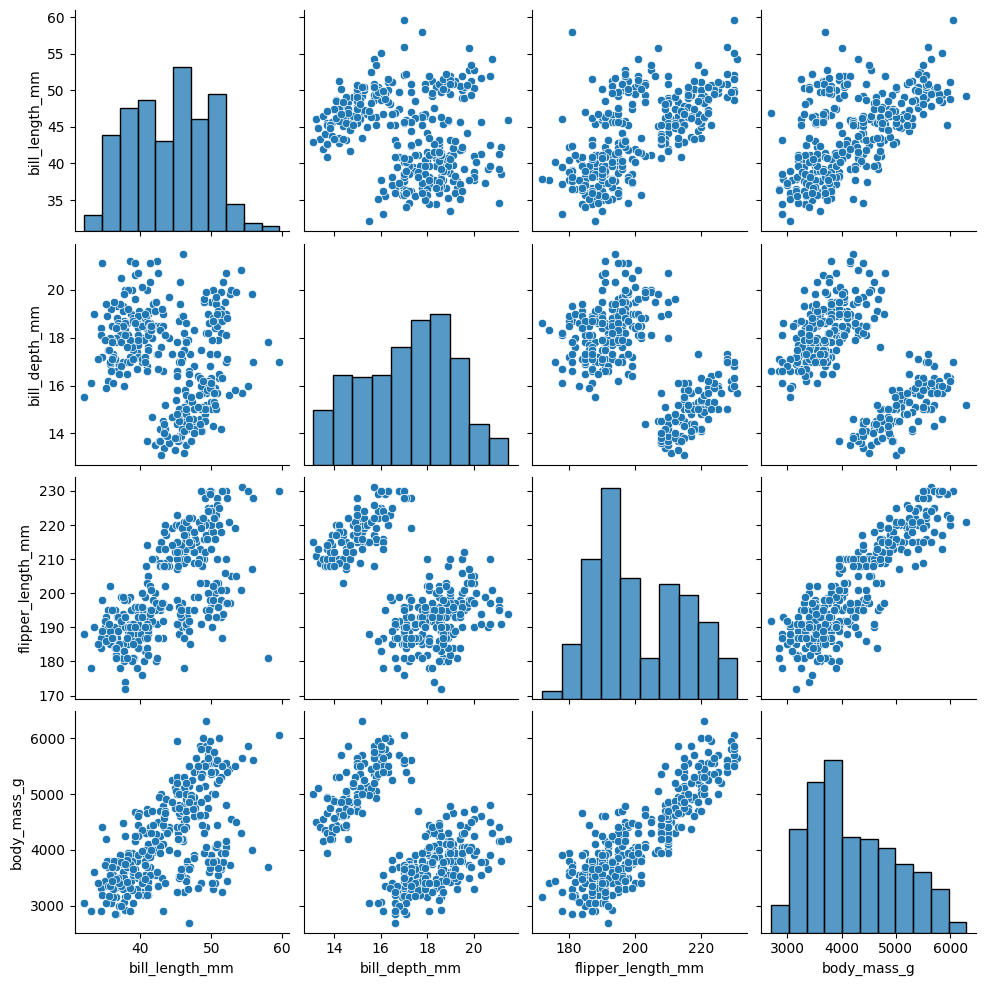

In [149]:
sns.pairplot(df)

In [150]:
#Separar X e y
X= df[['flipper_length_mm', 'bill_depth_mm', 'bill_length_mm']]
y= df['body_mass_g']
#Dataframe de resultados
df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE', 'MAPE'])


In [151]:
#Regresion lineal multiple
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) #(multiplicar * 100) error promedio de 7,7 % respecto del valor real de la masa corporal
df_resultados.loc[len(df_resultados)] = ['RLM 3col', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183


In [152]:
df = pd.get_dummies(df)
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True


<Axes: >

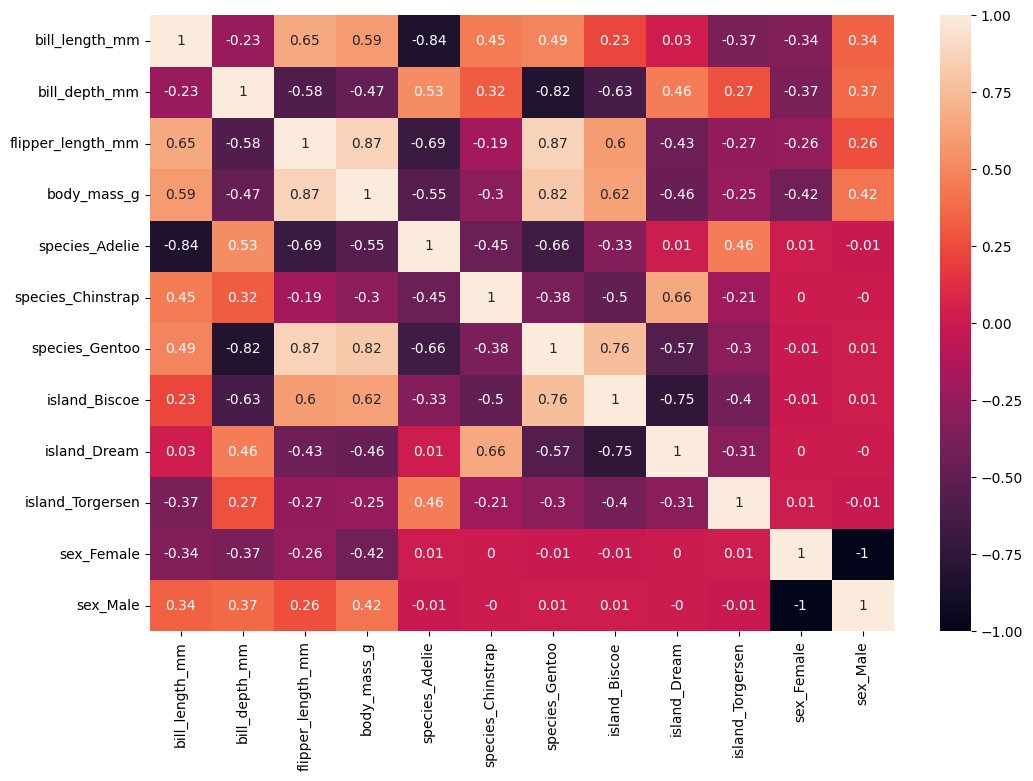

In [153]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr().round(2), annot=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'species_Adelie'),
  Text(1, 0, 'bill_depth_mm'),
  Text(2, 0, 'island_Dream'),
  Text(3, 0, 'sex_Female'),
  Text(4, 0, 'species_Chinstrap'),
  Text(5, 0, 'island_Torgersen'),
  Text(6, 0, 'sex_Male'),
  Text(7, 0, 'bill_length_mm'),
  Text(8, 0, 'island_Biscoe'),
  Text(9, 0, 'species_Gentoo'),
  Text(10, 0, 'flipper_length_mm')])

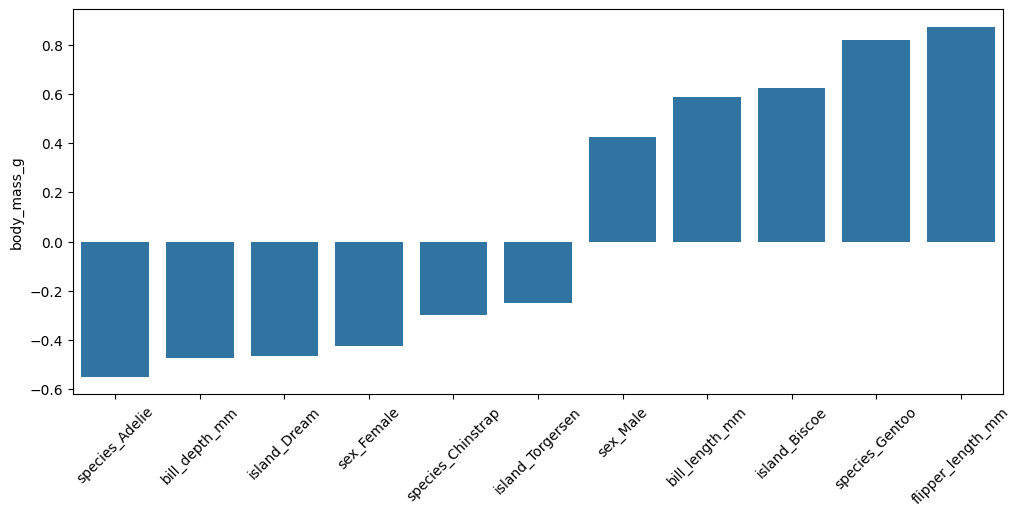

In [154]:
#correlaciones de cada columna con body_mass_g
plt.figure(figsize=(12, 5))
sns.barplot(df.corr()['body_mass_g'].drop('body_mass_g').sort_values())
plt.xticks(rotation=45)

In [155]:
X= df.drop('body_mass_g', axis=1)
y= df['body_mass_g']

#Regresion lineal multiple
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error promedio de 5,5 % respecto del valor real de la masa corporal
df_resultados.loc[len(df_resultados)] = ['RLM 11col', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
1,RLM 11col,0.875223,226.413652,284.005204,0.055982


In [156]:
#quitar columna sexo para con first_drop para evitar la correlacion -1 o multicolinealidad 
# observamos que da los mismos resultados que un get_dummies normales, lo que sugiere 
# que es mejor hacerlo con drop_first porque da menos columnas y el modelo es mas liviano 
# para entrenar
df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)
X= df.drop('body_mass_g', axis=1)
y= df['body_mass_g']

#Regresion lineal multiple
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error promedio de 5,5 % respecto del valor real de la masa corporal
df_resultados.loc[len(df_resultados)] = ['RLM 8col', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
2,RLM 8col,0.875223,226.413652,284.005204,0.055982


KNN es un algoritmo computacionalmente costoso, ya que es lazy o perezoso, realiza los calculos en el predict, no existe un entrenamiento pesado como en otros metodos, el modelo simplemente almacenas los datos en el entrenamiento, y para hacer una prediccion (regresion o clasificacion) busca y calcula los K vecinos mas cercanos

In [157]:
# KNN - K Nearest Neighbors
df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

X= df.drop('body_mass_g', axis=1)
y= df['body_mass_g']

#Regresion lineal multiple
model = KNeighborsRegressor()
model.fit(X, y)
y_pred = model.predict(X)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error promedio de 5,5 % respecto del valor real de la masa corporal
df_resultados.loc[len(df_resultados)] = ['Knn K = 5', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214


In [158]:
for k in range(1, 2):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, y)
    y_pred = model.predict(X)

    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) 
    
    df_resultados.loc[len(df_resultados)] = [f'Knn K = {k}', r2, mae, rmse, mape] 

df_resultados.sort_values('MAPE', inplace=True)
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
0,RLM 3col,0.763937,310.062518,390.637086,0.077183


In [159]:
#escalado y volver a probar KNN
#KNN es sensible al escalado

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

for k in range(2, 3):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_scaled, y)

    y_pred = model.predict(X_scaled)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) 
    
    df_resultados.loc[len(df_resultados)] = [f'Knn scaled K = {k}', r2, mae, rmse, mape] 



In [160]:
df_resultados.sort_values('MAE', ascending=True)

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
5,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
0,RLM 3col,0.763937,310.062518,390.637086,0.077183


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [162]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2= r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

df_resultados.loc[len(df_resultados)] = ['RLM all test', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
5,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
6,RLM all test,0.873280,208.168496,271.558568,0.052835


In [163]:
df_resultados.sort_values('MAPE', ascending=True)


,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
5,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
6,RLM all test,0.873280,208.168496,271.558568,0.052835
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
0,RLM 3col,0.763937,310.062518,390.637086,0.077183


In [164]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2= r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

df_resultados.loc[len(df_resultados)] = ['RLM all test', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
5,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
6,RLM all test,0.873280,208.168496,271.558568,0.052835
7,RLM all test,0.809014,277.500000,333.382288,0.071506


In [165]:
# Particionamiento con escalado para KNN MinMAxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

scaler = MinMaxScaler()
#introduce data leakage o fuga de datos
#scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for k in range(2, 10):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)

    r2= r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    df_resultados.loc[len(df_resultados)] = [f'RLM KNN scaled k = {k} (test)', r2, mae, rmse, mape]
df_resultados    

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
5,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
6,RLM all test,0.873280,208.168496,271.558568,0.052835
7,RLM all test,0.809014,277.500000,333.382288,0.071506
8,RLM KNN scaled k = 2 (test),0.834784,250.250000,310.075596,0.063747
9,RLM KNN scaled k = 3 (test),0.863136,216.666667,282.218395,0.055225


In [166]:
df_resultados.sort_values('MAPE', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]

C:\Users\user\AppData\Local\Temp\ipykernel_11048\1394773314.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values('MAPE', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]
C:\Users\user\AppData\Local\Temp\ipykernel_11048\1394773314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('MAPE', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]


,Modelo,R2,MAE,RMSE,MAPE
7,RLM all test,0.809014,277.500000,333.382288,0.071506
8,RLM KNN scaled k = 2 (test),0.834784,250.250000,310.075596,0.063747
13,RLM KNN scaled k = 7 (test),0.856686,225.214286,288.791907,0.058042
14,RLM KNN scaled k = 8 (test),0.856043,225.000000,289.439788,0.058026
10,RLM KNN scaled k = 4 (test),0.853799,226.750000,291.686904,0.057737
11,RLM KNN scaled k = 5 (test),0.856384,225.700000,289.096005,0.057532
12,RLM KNN scaled k = 6 (test),0.857951,221.750000,287.515096,0.056856
9,RLM KNN scaled k = 3 (test),0.863136,216.666667,282.218395,0.055225
15,RLM KNN scaled k = 9 (test),0.867663,211.888889,277.512095,0.054886
6,RLM all test,0.873280,208.168496,271.558568,0.052835


In [167]:
df_resultados.sort_values('R2', ascending=False)


,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
5,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
6,RLM all test,0.873280,208.168496,271.558568,0.052835
15,RLM KNN scaled k = 9 (test),0.867663,211.888889,277.512095,0.054886
9,RLM KNN scaled k = 3 (test),0.863136,216.666667,282.218395,0.055225
12,RLM KNN scaled k = 6 (test),0.857951,221.750000,287.515096,0.056856
13,RLM KNN scaled k = 7 (test),0.856686,225.214286,288.791907,0.058042


In [168]:
#STANDARDSCALER en regresion lineal multiple
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#aplicar estandarizacion
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) # error del 5,5 % con respecto de valor real

df_resultados.loc[len(df_resultados)] = ['RLM 8 col scaled (test)', r2, mae, rmse, mape] # Está sería la mejor opción con 8 columnas nos da igual resultado que con 11 columnas


In [169]:
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
5,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
16,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
6,RLM all test,0.873280,208.168496,271.558568,0.052835
15,RLM KNN scaled k = 9 (test),0.867663,211.888889,277.512095,0.054886
9,RLM KNN scaled k = 3 (test),0.863136,216.666667,282.218395,0.055225
12,RLM KNN scaled k = 6 (test),0.857951,221.750000,287.515096,0.056856


In [170]:
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]

C:\Users\user\AppData\Local\Temp\ipykernel_11048\2844860035.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]
C:\Users\user\AppData\Local\Temp\ipykernel_11048\2844860035.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]


,Modelo,R2,MAE,RMSE,MAPE
16,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
6,RLM all test,0.873280,208.168496,271.558568,0.052835
15,RLM KNN scaled k = 9 (test),0.867663,211.888889,277.512095,0.054886
9,RLM KNN scaled k = 3 (test),0.863136,216.666667,282.218395,0.055225
12,RLM KNN scaled k = 6 (test),0.857951,221.750000,287.515096,0.056856
13,RLM KNN scaled k = 7 (test),0.856686,225.214286,288.791907,0.058042
11,RLM KNN scaled k = 5 (test),0.856384,225.700000,289.096005,0.057532
14,RLM KNN scaled k = 8 (test),0.856043,225.000000,289.439788,0.058026
10,RLM KNN scaled k = 4 (test),0.853799,226.750000,291.686904,0.057737
8,RLM KNN scaled k = 2 (test),0.834784,250.250000,310.075596,0.063747


CART Arbol de decision para regresion
* Facil interpretabilidad, scikit nos muestra el arbol resultante en textto o imagen
* No necesita el escalado
* no le afectan tanto los outliers, deberia afectarle menos que a un knn
* hace automaticamente los cortes umbrales para decidir los nodos
* Inportante: ajustar la profindidad para evitar el overfitting o sobreajuste
* Por sí solo puede ser débil, suele usarse en combinación de muchos arboles coreando asi un Random Forest
* Sencible a cambio en los umbrales, si hay pocos datos


In [171]:
#sin particionamiento
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
# 2 a 10 niveles de profundidad

model = DecisionTreeRegressor()
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) 

df_resultados.loc[len(df_resultados)] = ['DTR ' , r2, mae, rmse, mape] 
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
17,DTR,1.000000,0.000000,0.000000,0.000000
5,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
16,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
6,RLM all test,0.873280,208.168496,271.558568,0.052835
15,RLM KNN scaled k = 9 (test),0.867663,211.888889,277.512095,0.054886
9,RLM KNN scaled k = 3 (test),0.863136,216.666667,282.218395,0.055225


In [172]:
#ver el arbol en forma de texto
print(export_text(model, feature_names=X.columns))

|--- species_Gentoo <= 0.50
|   |--- sex_Male <= 0.50
|   |   |--- bill_depth_mm <= 17.15
|   |   |   |--- flipper_length_mm <= 192.50
|   |   |   |   |--- flipper_length_mm <= 191.50
|   |   |   |   |   |--- bill_length_mm <= 45.55
|   |   |   |   |   |   |--- bill_depth_mm <= 16.65
|   |   |   |   |   |   |   |--- flipper_length_mm <= 182.00
|   |   |   |   |   |   |   |   |--- island_Dream <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [2850.00]
|   |   |   |   |   |   |   |   |--- island_Dream >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [2900.00]
|   |   |   |   |   |   |   |--- flipper_length_mm >  182.00
|   |   |   |   |   |   |   |   |--- bill_length_mm <= 36.05
|   |   |   |   |   |   |   |   |   |--- value: [3050.00]
|   |   |   |   |   |   |   |   |--- bill_length_mm >  36.05
|   |   |   |   |   |   |   |   |   |--- bill_length_mm <= 37.35
|   |   |   |   |   |   |   |   |   |   |--- island_Dream <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- v

[Text(0.576275086135007, 0.9736842105263158, 'species_Gentoo <= 0.5\nsquared_error = 646425.423\nsamples = 333\nvalue = 4207.057'),
 Text(0.3311349247278792, 0.9210526315789473, 'sex_Male <= 0.5\nsquared_error = 188918.847\nsamples = 214\nvalue = 3714.72'),
 Text(0.4537050054314431, 0.9473684210526316, 'True  '),
 Text(0.16047034102879212, 0.868421052631579, 'bill_depth_mm <= 17.15\nsquared_error = 79375.928\nsamples = 107\nvalue = 3419.159'),
 Text(0.07957338483146068, 0.8157894736842105, 'flipper_length_mm <= 192.5\nsquared_error = 89067.75\nsamples = 37\nvalue = 3281.081'),
 Text(0.06293890449438203, 0.7631578947368421, 'flipper_length_mm <= 191.5\nsquared_error = 78214.923\nsamples = 29\nvalue = 3211.207'),
 Text(0.0507373595505618, 0.7105263157894737, 'bill_length_mm <= 45.55\nsquared_error = 71961.591\nsamples = 27\nvalue = 3237.963'),
 Text(0.03476123595505618, 0.6578947368421053, 'bill_depth_mm <= 16.65\nsquared_error = 65486.0\nsamples = 25\nvalue = 3208.0'),
 Text(0.011235955

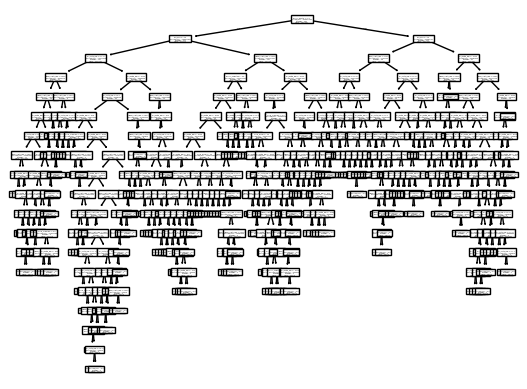

In [173]:
#ver el arbol de forma grafica
plot_tree(model, feature_names=X.columns)

In [174]:
#ponermos una profundidad de 2

model = DecisionTreeRegressor(max_depth=2)
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) 

df_resultados.loc[len(df_resultados)] = ['DTR depth 2b' , r2, mae, rmse, mape] 
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
17,DTR,1.000000,0.000000,0.000000,0.000000
5,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
16,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
6,RLM all test,0.873280,208.168496,271.558568,0.052835
15,RLM KNN scaled k = 9 (test),0.867663,211.888889,277.512095,0.054886
9,RLM KNN scaled k = 3 (test),0.863136,216.666667,282.218395,0.055225


In [175]:
print(export_text(model, feature_names=X.columns))


|--- species_Gentoo <= 0.50
|   |--- sex_Male <= 0.50
|   |   |--- value: [3419.16]
|   |--- sex_Male >  0.50
|   |   |--- value: [4010.28]
|--- species_Gentoo >  0.50
|   |--- sex_Male <= 0.50
|   |   |--- value: [4679.74]
|   |--- sex_Male >  0.50
|   |   |--- value: [5484.84]



[Text(0.5, 0.8333333333333334, 'species_Gentoo <= 0.5\nsquared_error = 646425.423\nsamples = 333\nvalue = 4207.057'),
 Text(0.25, 0.5, 'sex_Male <= 0.5\nsquared_error = 188918.847\nsamples = 214\nvalue = 3714.72'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 79375.928\nsamples = 107\nvalue = 3419.159'),
 Text(0.375, 0.16666666666666666, 'squared_error = 123749.454\nsamples = 107\nvalue = 4010.28'),
 Text(0.75, 0.5, 'sex_Male <= 0.5\nsquared_error = 249365.07\nsamples = 119\nvalue = 5092.437'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 77919.33\nsamples = 58\nvalue = 4679.741'),
 Text(0.875, 0.16666666666666666, 'squared_error = 96460.629\nsamples = 61\nvalue = 5484.836')]

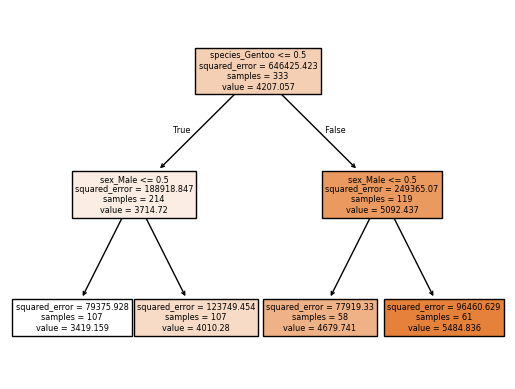

In [176]:
plot_tree(model, feature_names=X.columns, filled=True)

In [177]:

for depth in range(2, 10):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X, y)

    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f'DTR depth {depth}' , r2, mae, rmse, mape] 

df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
17,DTR,1.000000,0.000000,0.000000,0.000000
26,DTR depth 9,0.979163,66.124100,116.059321,0.017399
25,DTR depth 8,0.966464,95.197774,147.236934,0.024358
24,DTR depth 7,0.950184,124.736132,179.450216,0.031578
5,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
23,DTR depth 6,0.933635,153.929241,207.122845,0.038373
22,DTR depth 5,0.913913,183.844444,235.899754,0.045646
16,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
21,DTR depth 4,0.893988,204.162386,261.780534,0.050912


In [178]:
# con particionamiento de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

for depth in range(2, 10):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f'DTR depth {depth} (test)' , r2, mae, rmse, mape] 

df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
17,DTR,1.000000,0.000000,0.000000,0.000000
26,DTR depth 9,0.979163,66.124100,116.059321,0.017399
25,DTR depth 8,0.966464,95.197774,147.236934,0.024358
24,DTR depth 7,0.950184,124.736132,179.450216,0.031578
5,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
23,DTR depth 6,0.933635,153.929241,207.122845,0.038373
22,DTR depth 5,0.913913,183.844444,235.899754,0.045646
16,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
21,DTR depth 4,0.893988,204.162386,261.780534,0.050912


In [179]:
#con filtro
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('DTR')]

C:\Users\user\AppData\Local\Temp\ipykernel_11048\2426084521.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('DTR')]


,Modelo,R2,MAE,RMSE,MAPE
17,DTR,1.000000,0.000000,0.000000,0.000000
26,DTR depth 9,0.979163,66.124100,116.059321,0.017399
25,DTR depth 8,0.966464,95.197774,147.236934,0.024358
24,DTR depth 7,0.950184,124.736132,179.450216,0.031578
23,DTR depth 6,0.933635,153.929241,207.122845,0.038373
22,DTR depth 5,0.913913,183.844444,235.899754,0.045646
21,DTR depth 4,0.893988,204.162386,261.780534,0.050912
20,DTR depth 3,0.873522,224.806433,285.934100,0.055847
27,DTR depth 2 (test),0.867135,224.532382,289.304823,0.056626
29,DTR depth 4 (test),0.863858,235.921803,292.850421,0.058694


In [180]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


#model = RandomForestRegressor() # n_estimators por defecto es de 100 arboles
for depth in range(2, 10):
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f'RF depth {depth} (test)' , r2, mae, rmse, mape] 

df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')]

C:\Users\user\AppData\Local\Temp\ipykernel_11048\3309543409.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')]


,Modelo,R2,MAE,RMSE,MAPE
16,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
37,RF depth 4 (test),0.885708,214.745757,268.322638,0.053681
36,RF depth 3 (test),0.884395,211.294082,269.859577,0.053121
38,RF depth 5 (test),0.882042,219.248383,272.592124,0.054719
39,RF depth 6 (test),0.880306,220.442156,274.591284,0.054966
40,RF depth 7 (test),0.876859,229.015129,278.516421,0.057085
41,RF depth 8 (test),0.873924,228.257785,281.816978,0.056963
6,RLM all test,0.873280,208.168496,271.558568,0.052835
35,RF depth 2 (test),0.868374,223.227742,287.953179,0.056126
15,RLM KNN scaled k = 9 (test),0.867663,211.888889,277.512095,0.054886


In [181]:
#con 200 arboles
for depth in range(2, 10):
    model = RandomForestRegressor(n_estimators= 200, max_depth=depth)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f'RF 201 depth {depth} (test)' , r2, mae, rmse, mape] 

df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')]

C:\Users\user\AppData\Local\Temp\ipykernel_11048\714292210.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')]


,Modelo,R2,MAE,RMSE,MAPE
16,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
45,RF 201 depth 4 (test),0.890278,209.614736,262.904389,0.052515
46,RF 201 depth 5 (test),0.886272,215.429667,267.660450,0.053735
37,RF depth 4 (test),0.885708,214.745757,268.322638,0.053681
36,RF depth 3 (test),0.884395,211.294082,269.859577,0.053121
47,RF 201 depth 6 (test),0.884001,219.748890,270.319112,0.054542
38,RF depth 5 (test),0.882042,219.248383,272.592124,0.054719
44,RF 201 depth 3 (test),0.881256,215.249607,273.499554,0.054036
39,RF depth 6 (test),0.880306,220.442156,274.591284,0.054966
40,RF depth 7 (test),0.876859,229.015129,278.516421,0.057085


In [182]:
#agregando poda ccp_alpha
for depth in range(2, 10):
    model = RandomForestRegressor(n_estimators= 200, max_depth=depth, ccp_alpha=0.01)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f'RF 201 ccp depth {depth} (test)' , r2, mae, rmse, mape] 

df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')]

C:\Users\user\AppData\Local\Temp\ipykernel_11048\926475563.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')]


,Modelo,R2,MAE,RMSE,MAPE
16,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
45,RF 201 depth 4 (test),0.890278,209.614736,262.904389,0.052515
54,RF 201 ccp depth 5 (test),0.889737,213.599889,263.551694,0.053267
53,RF 201 ccp depth 4 (test),0.889455,209.605587,263.888137,0.052456
46,RF 201 depth 5 (test),0.886272,215.429667,267.660450,0.053735
37,RF depth 4 (test),0.885708,214.745757,268.322638,0.053681
36,RF depth 3 (test),0.884395,211.294082,269.859577,0.053121
52,RF 201 ccp depth 3 (test),0.884188,211.856247,270.101265,0.053285
47,RF 201 depth 6 (test),0.884001,219.748890,270.319112,0.054542
38,RF depth 5 (test),0.882042,219.248383,272.592124,0.054719


## SVM Support Vector MAchines 
* SVR Regresion 
* SVC Clasificacion

In [183]:
from sklearn.svm import SVR

c_values = [0.5, 1, 5, 10, 100, 500, 1000, 5000, 10000, 50000, 7400000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



for c in c_values:
    model = SVR(C=c) #valor de epsilon si es cercano a 0 no habra margen para error y produce overfitting
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f'SVR C {c} (test)' , r2, mae, rmse, mape] 

df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')]




C:\Users\user\AppData\Local\Temp\ipykernel_11048\4069873926.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')]


,Modelo,R2,MAE,RMSE,MAPE
16,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
45,RF 201 depth 4 (test),0.890278,209.614736,262.904389,0.052515
54,RF 201 ccp depth 5 (test),0.889737,213.599889,263.551694,0.053267
53,RF 201 ccp depth 4 (test),0.889455,209.605587,263.888137,0.052456
46,RF 201 depth 5 (test),0.886272,215.429667,267.660450,0.053735
37,RF depth 4 (test),0.885708,214.745757,268.322638,0.053681
36,RF depth 3 (test),0.884395,211.294082,269.859577,0.053121
52,RF 201 ccp depth 3 (test),0.884188,211.856247,270.101265,0.053285
47,RF 201 depth 6 (test),0.884001,219.748890,270.319112,0.054542
38,RF depth 5 (test),0.882042,219.248383,272.592124,0.054719


In [184]:
c_values = [100, 500, 1000, 5000, 10000, 50000, 800000]
epsilon_values = [0.01, 0.1, 0.5, 1, 2, 5, 10, 100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



for c in c_values:
    for e in epsilon_values:
        model = SVR(C=c) #valor de epsilon si es cercano a 0 no habra margen para error y produce overfitting
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred) 

        df_resultados.loc[len(df_resultados)] = [f'SVR C {c} e {e} (test)' , r2, mae, rmse, mape] 

df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')].tail(30)

C:\Users\user\AppData\Local\Temp\ipykernel_11048\162127424.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')].tail(30)


,Modelo,R2,MAE,RMSE,MAPE
88,SVR C 1000 e 0.5 (test),0.791657,295.110210,362.276346,0.073418
87,SVR C 1000 e 0.1 (test),0.791657,295.110210,362.276346,0.073418
65,SVR C 1000 (test),0.791657,295.110210,362.276346,0.073418
86,SVR C 1000 e 0.01 (test),0.791657,295.110210,362.276346,0.073418
90,SVR C 1000 e 2 (test),0.791657,295.110210,362.276346,0.073418
33,DTR depth 8 (test),0.772144,283.061524,378.861082,0.069473
32,DTR depth 7 (test),0.769866,286.604119,380.750559,0.070368
34,DTR depth 9 (test),0.766921,287.231860,383.178859,0.069845
78,SVR C 500 e 0.01 (test),0.757464,321.901338,390.875694,0.079924
83,SVR C 500 e 5 (test),0.757464,321.901338,390.875694,0.079924


In [185]:
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
17,DTR,1.000000,0.000000,0.000000,0.000000
26,DTR depth 9,0.979163,66.124100,116.059321,0.017399
25,DTR depth 8,0.966464,95.197774,147.236934,0.024358
24,DTR depth 7,0.950184,124.736132,179.450216,0.031578
...,...,...,...,...,...
71,SVR C 100 e 0.1 (test),0.405492,500.774016,611.968265,0.119374
62,SVR C 10 (test),0.027335,631.118539,782.765914,0.147854
61,SVR C 5 (test),0.001209,639.999568,793.208804,0.150032
60,SVR C 1 (test),-0.020039,647.104120,801.601545,0.151775
